<a href="https://colab.research.google.com/github/ismail-ru-cse-39/Intrusion-Detection-System/blob/main/Final_IntrusionDetectionSystem_NSLKDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kddcup.names to kddcup.names


In [ ]:
with open("kddcup.names", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:

cols ="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns =[]
for c in cols.split(','):
	if(c.strip()):
	  columns.append(c.strip())

columns.append('class')
print(len(columns))


42


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving training_attack_types to training_attack_types


In [ ]:

with open("training_attack_types", 'r') as f:
	print(f.read())


back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [ ]:

attacks_types = {
	'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


In [ ]:
print(len(attacks_types))

23


In [ ]:
#Reading the dataset(‘kddcup.data_10_percent.gz’) and adding Attack Type feature in the training dataset where attack type feature has 5 distinct values i.e. dos, normal, probe, r2l, u2r.

#Reading sadiq_nsl_kdd.csv

from google.colab import files

uploaded = files.upload()

Saving sadiq_nsl_kdd.csv to sadiq_nsl_kdd.csv


In [ ]:
# path = "kddcup.data_10_percent.gz"

path = "sadiq_nsl_kdd.csv"
df = pd.read_csv(path, names = columns)
  
# Adding Attack Type column
# df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df.shape

(125973, 42)

In [ ]:
#Finding missing value
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
# cate_cols.remove('target')
# cate_cols.remove('Attack Type')

cate_cols.remove('class')

print(cate_cols)


['service', 'protocol_type', 'flag']


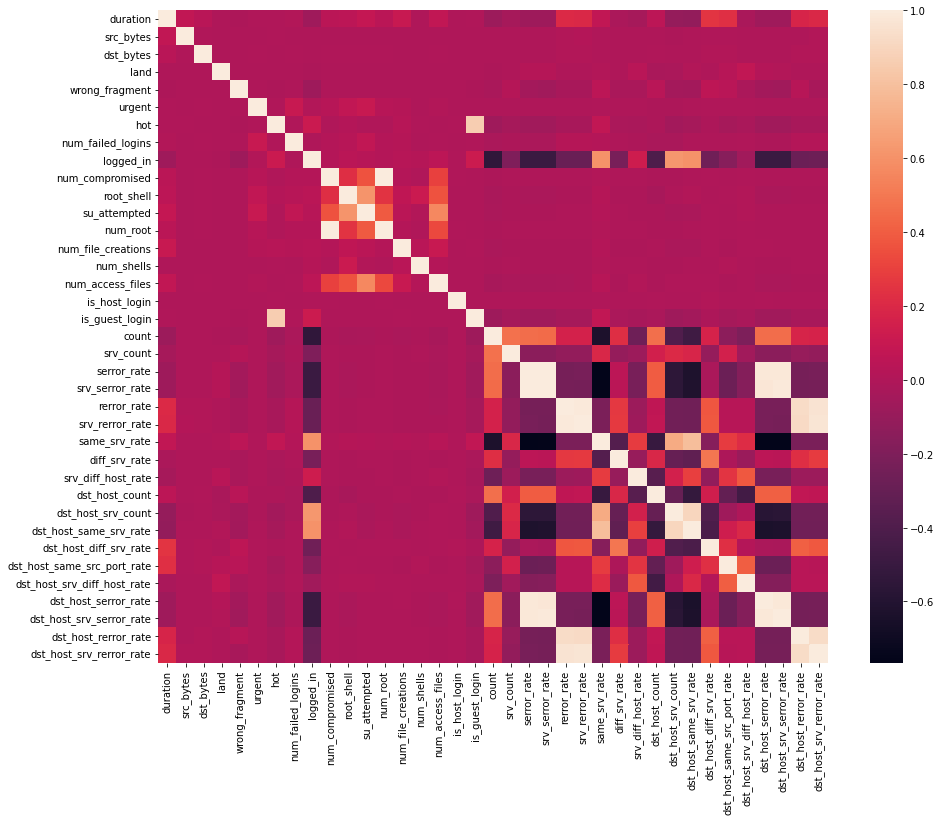

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [ ]:
#Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis.

df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize =(15, 12))

sns.heatmap(corr)

plt.show()

df.columns



In [ ]:

# This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)




In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal


In [ ]:

# protocol_type feature mapping
pmap = {'icmp':0, 'tcp':1, 'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)


In [ ]:

# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
df['flag'] = df['flag'].map(fmap)



In [ ]:

df.drop('service', axis = 1, inplace = True)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:

# Splitting the dataset
# df = df.drop(['target', ], axis = 1)
print(df.shape)

# Target variable and train set
y = df[['class']]
X = df.drop(['class', ], axis = 1)

Xx = X

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(125973, 32)
(84401, 31) (41572, 31)
(84401, 1) (41572, 1)


In [ ]:
#TRAINING

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clfg = GaussianNB()
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)



Training time:  0.15411949157714844


In [ ]:

start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)



Testing time:  0.03365921974182129


In [ ]:

print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))



Train score is: 0.8977500266584519
Test score is: 0.8943519676705475


In [ ]:
#Practicing Hybridsampling (SMOTE)
print("Before OverSampling, counts of label '1': {}")
print(y_train.shape)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values.ravel())

Before OverSampling, counts of label '1': {}
(84401, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(y_train_res.shape)
print(X_train_res.shape)

start_time = time.time()
clfg.fit(X_train_res, y_train_res.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

(90300,)
(90300, 31)
Training time:  0.15885138511657715


In [ ]:
start_time = time.time()
y_test_pred = clfg.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.01784682273864746


In [ ]:
print("Train score is:", clfg.score(X_train_res,y_train_res.ravel()))
print("Test score is:", clfg.score(X_test, y_test))

Train score is: 0.8992248062015504
Test score is: 0.8919705571057442


In [ ]:
#Practicing Hybridsampling - OSS
print("Before OSS, counts of label '1': {}")
print(y_train_res.shape)

from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state = 42)
X_train_hyb, y_train_hyb = oss.fit_sample(X_train_res, y_train_res)

Before OSS, counts of label '1': {}
(90300,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(y_train_hyb.shape)
print(X_train_hyb.shape)

start_time = time.time()
clfg.fit(X_train_hyb, y_train_hyb.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

(90105,)
(90105, 31)
Training time:  0.1535954475402832


In [ ]:
X_train_res

array([[0.96662627, 0.5       , 0.3       , ..., 0.26      , 0.51      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [0.        , 0.5       , 0.1       , ..., 0.06      , 0.        ,
        0.        ],
       ...,
       [0.        , 0.5       , 0.1       , ..., 0.05      , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.1       , ..., 0.06      , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.2       , ..., 0.08268661, 0.        ,
        0.        ]])

In [ ]:
# IGNORED


start_time = time.time()
y_test_pred = clfg.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.020677804946899414


In [ ]:
# IGNORED


print("Train score is:", clfg.score(X_train_hyb,y_train_hyb.ravel()))
print("Test score is:", clfg.score(X_test, y_test))

Train score is: 0.9003828866322624
Test score is: 0.8930049071490426


In [ ]:
#SVM
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

print(y_train_hyb.shape)
print(X_train_hyb.shape)

start_time = time.time()
clfg.fit(X_train_hyb, y_train_hyb.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

(90105,)
(90105, 31)
Training time:  0.14792442321777344


In [ ]:
start_time = time.time()
y_test_pred = clfg.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.01714158058166504


In [ ]:
print("Train score is:", clfg.score(X_train_hyb,y_train_hyb.ravel()))
print("Test score is:", clfg.score(X_test, y_test))

Train score is: 0.9003828866322624
Test score is: 0.8930049071490426


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train_hyb,y_train_hyb.ravel())
y_test_pred = dt.predict(X_test)
print("Train score is:", dt.score(X_train_hyb,y_train_hyb.ravel()))
print("Test score is:", dt.score(X_test, y_test))

Train score is: 0.9999001165307142
Test score is: 0.9952852881747329
